In [20]:
import pandas as pd
import numpy as np


# Load files
init_values = pd.read_excel("init_values.xlsx", index_col=0)
cov_matrix = pd.read_excel("covariance_matrix.xlsx", index_col=0)



# Delta t (weekly)
delta_t = 1 / 52
mu = np.array([0, 0.07 * delta_t, 0.06 * delta_t, 0, 0])
Sigma = cov_matrix.values


In [21]:
# Udskriv index og kolonnenavne for at tjekke rækkefølgen af variabler
print("Row/Column Names in Covariance Matrix:")
print(cov_matrix.index)

Row/Column Names in Covariance Matrix:
Index(['fx_spot', 'EQV US', 'EQV EUR', '1M EUR', '1Y EUR', '3Y EUR', '5Y EUR',
       '7Y EUR', '10Y EUR', '1M USD', '1Y USD', '3Y USD', '5Y USD', '7Y USD',
       '10Y USD'],
      dtype='object')


In [22]:
# Definer de relevante variabler baseret på opgaven
relevant_vars = ["fx_spot", "EQV US", "EQV EUR", "5Y USD", "5Y EUR"]

# Find de tilsvarende indekser
relevant_indices = [cov_matrix.index.get_loc(var) for var in relevant_vars]

# Ekstrahér den relevante submatrix
Sigma_relevant = cov_matrix.values[np.ix_(relevant_indices, relevant_indices)]

# Udskriv for at validere
print("\nRelevant Submatrix of Covariance Matrix (Sigma):")
print(Sigma_relevant)


Relevant Submatrix of Covariance Matrix (Sigma):
[[ 1.12779512e-04  3.84203518e-05 -4.70984341e-06 -3.15174770e-06
  -3.89102971e-07]
 [ 3.84203518e-05  4.28008869e-04  3.36015614e-04  1.66597186e-06
  -3.14903150e-06]
 [-4.70984341e-06  3.36015614e-04  4.65448341e-04  3.44481039e-06
  -1.78206509e-06]
 [-3.15174770e-06  1.66597186e-06  3.44481039e-06  1.16941118e-06
   6.53767826e-07]
 [-3.89102971e-07 -3.14903150e-06 -1.78206509e-06  6.53767826e-07
   7.24487443e-07]]


In [23]:
# Holding-vektor (fordeling på de 5 variabler)
h = np.array([0.4, 0.3, 0.2, 0.1, 0.0])

# Beregn forventning og varians af porteføljens PnL
E_portfolio_PnL = h.T @ mu  # Forventning af porteføljen
Var_portfolio_PnL = h.T @ Sigma_relevant @ h  # Varians af porteføljen
Std_portfolio_PnL = np.sqrt(Var_portfolio_PnL)  # Standardafvigelse

# Udskriv resultater
print("\nForventet portefølje PnL (E[Portfolio PnL]):", E_portfolio_PnL)
print("Varians af portefølje PnL (Var[Portfolio PnL]):", Var_portfolio_PnL)
print("Standardafvigelse af portefølje PnL (Std[Portfolio PnL]):", Std_portfolio_PnL)



Forventet portefølje PnL (E[Portfolio PnL]): 0.0006346153846153847
Varians af portefølje PnL (Var[Portfolio PnL]): 0.00012396994186381985
Standardafvigelse af portefølje PnL (Std[Portfolio PnL]): 0.011134178993703121


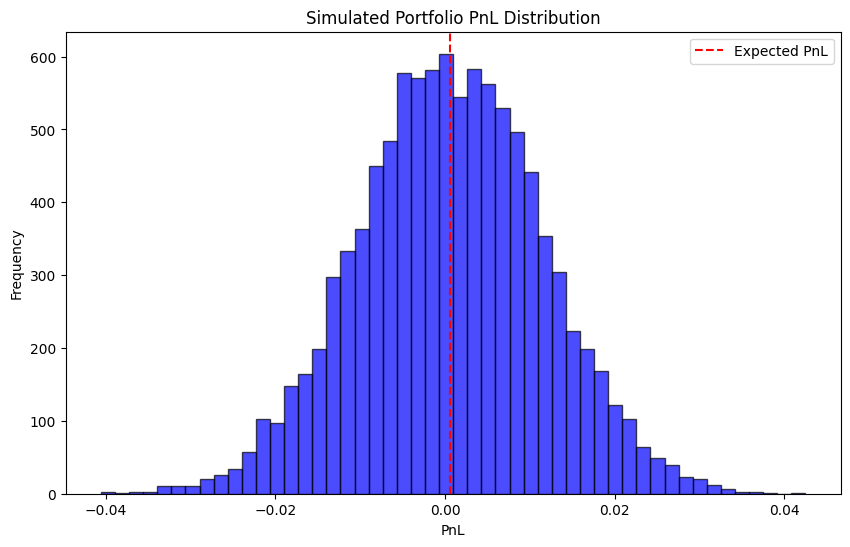

In [24]:
import matplotlib.pyplot as plt

# Simulér PnL-distribution baseret på normalfordeling
simulated_PnL = np.random.normal(E_portfolio_PnL, Std_portfolio_PnL, 10000)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(simulated_PnL, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title("Simulated Portfolio PnL Distribution")
plt.xlabel("PnL")
plt.ylabel("Frequency")
plt.axvline(E_portfolio_PnL, color='red', linestyle='dashed', linewidth=1.5, label="Expected PnL")
plt.legend()
plt.show()
